In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load house price data from Github
df = pd. read_csv ("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

Part 1: Data Understanding

Intro: Dataset Structure Overview

In [4]:
# Print first few rows
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
# print the shape
print(df.shape)

(1460, 81)


In [6]:
# print the data types
pd.set_option('display.max_rows', None)

# pd.reset_option('max_rows')
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
# check for missing values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Report:
The House Price dataset contains 1,460 records and 81 variables, comprising a mix of numerical and categorical features related to residential property characteristics and sale price.

1. Univariate Analysis

In [16]:
#Identify variable types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [17]:
#Numerical variables
df[num_cols].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


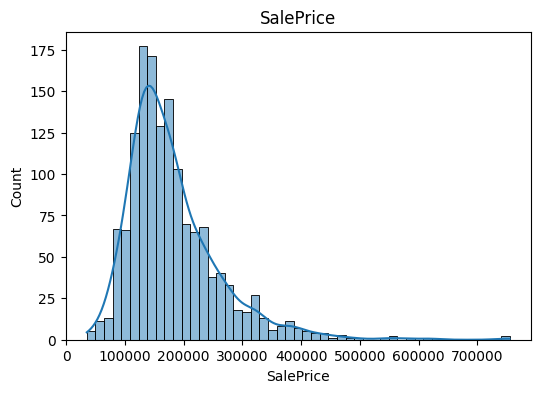

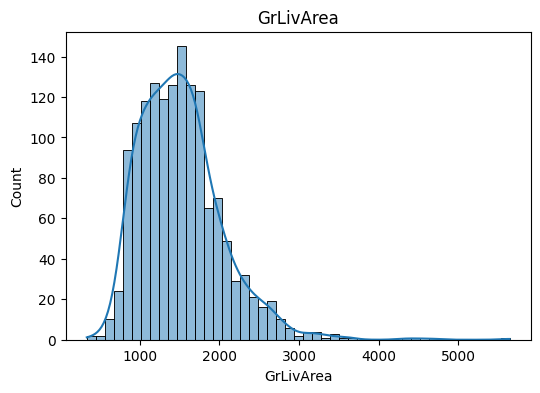

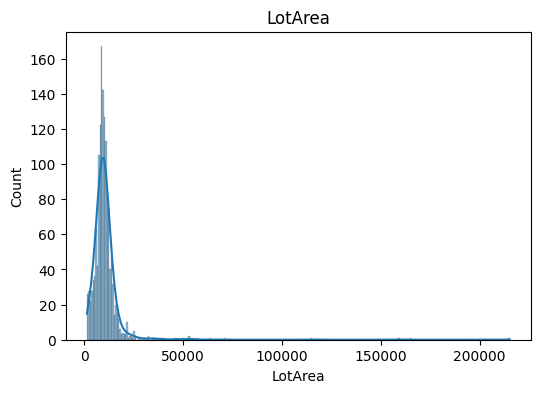

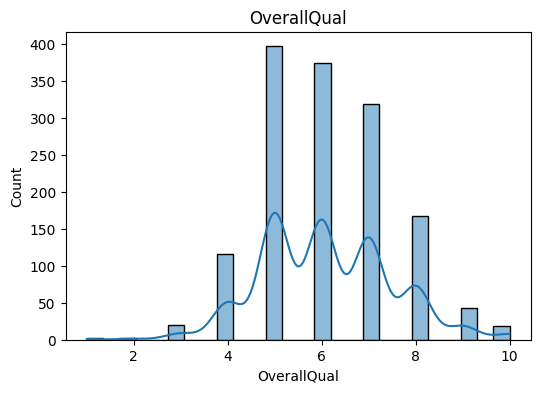

In [18]:
#distribution
num_vars = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual']

for col in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

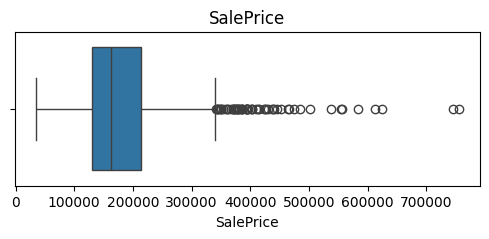

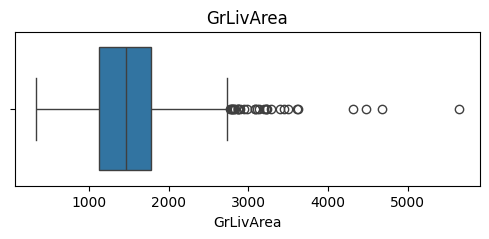

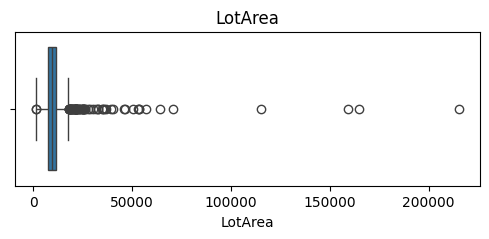

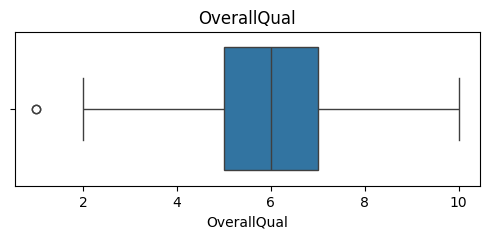

In [19]:
#outliers
for col in num_vars:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [20]:
#Categorical variables： frequency check
cat_vars = ['MSZoning', 'Neighborhood', 'HouseStyle', 'SaleCondition']

for col in cat_vars:
    print(df[col].value_counts())
    print('-' * 40)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------------------------
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
----------------------------------------
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64
----------------------------------------
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64
----------------------------------------


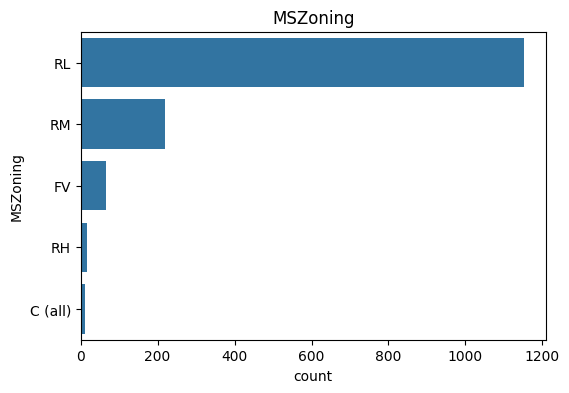

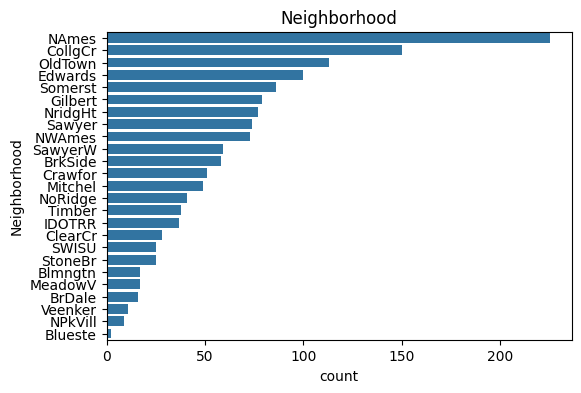

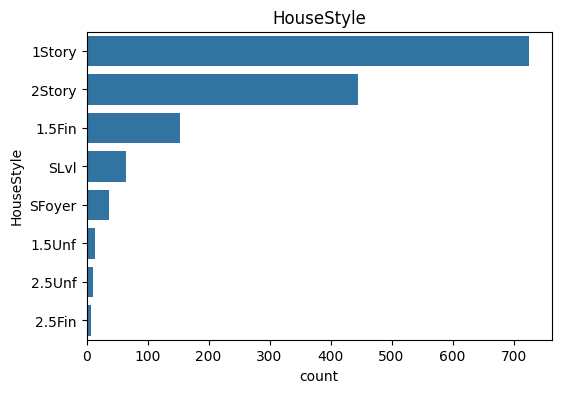

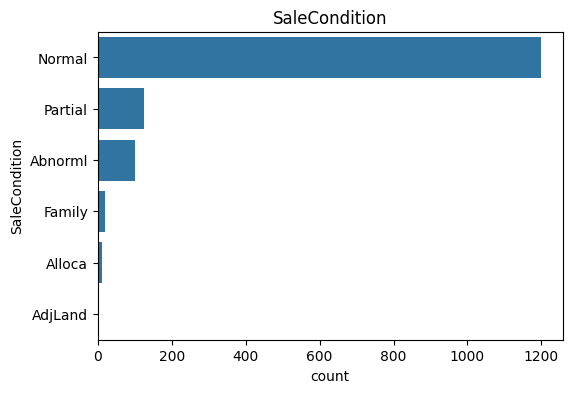

In [21]:
#count plots
for col in cat_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().index
    )
    plt.title(col)
    plt.show()

Report:

Most numerical variables show right-skewed distributions and contain a few extreme values, which is typical in housing data. Categorical variables vary in frequency and exhibit some imbalance, suggesting the need for careful preprocessing in later steps.

2. Bivariate Analysis

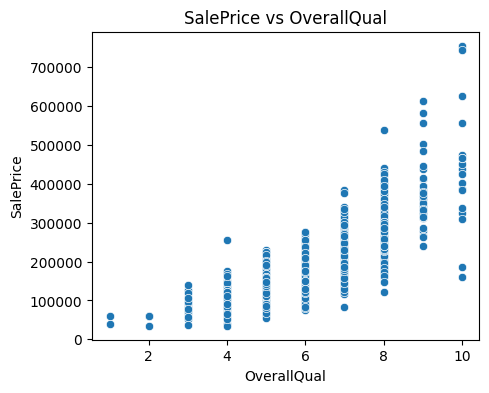

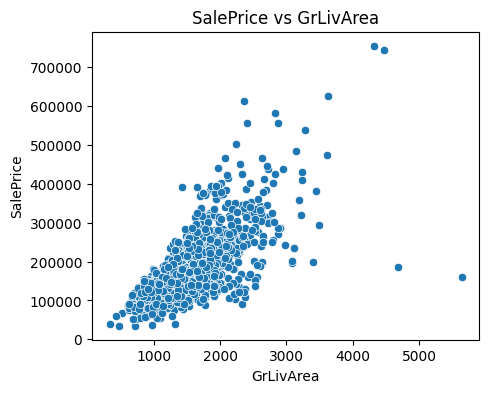

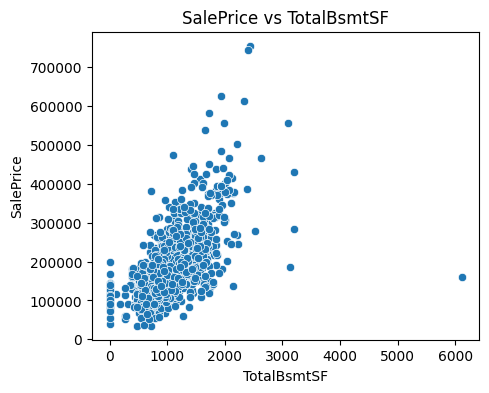

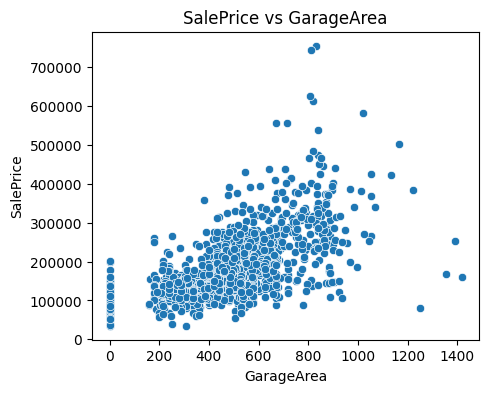

In [22]:
#SalePrice vs Numerical Variables
num_vars = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

for col in num_vars:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

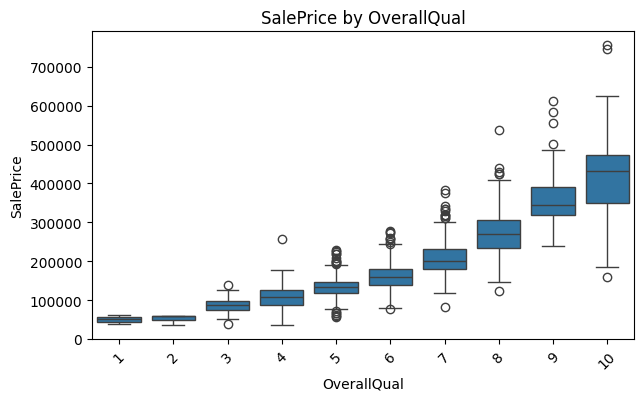

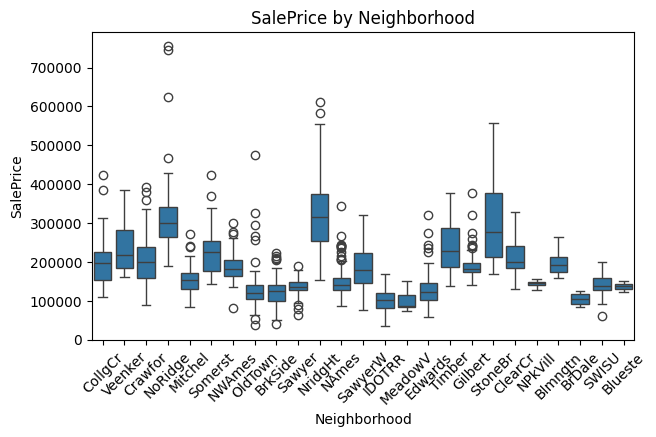

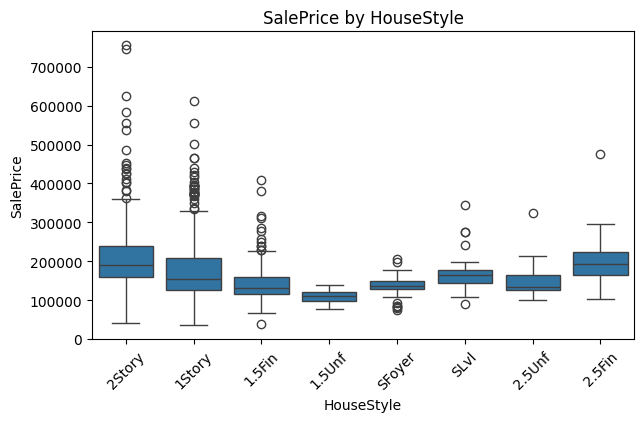

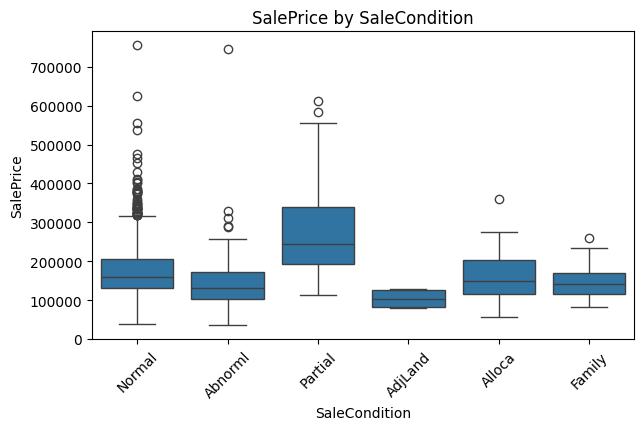

In [23]:
#SalePrice vs Categorical Variables
cat_vars = ['OverallQual', 'Neighborhood', 'HouseStyle', 'SaleCondition']

for col in cat_vars:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.xticks(rotation=45)
    plt.title(f'SalePrice by {col}')
    plt.show()

Report:

SalePrice shows strong positive relationships with quality- and size-related numerical variables such as OverallQual and GrLivArea. Categorical features, particularly Neighborhood and OverallQual, display clear differences in price distributions, indicating their importance in explaining housing prices.

3. Multivariate Analysis

In [24]:
#Correlation Matrix (Numerical Variables)
corr = df[num_cols].corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


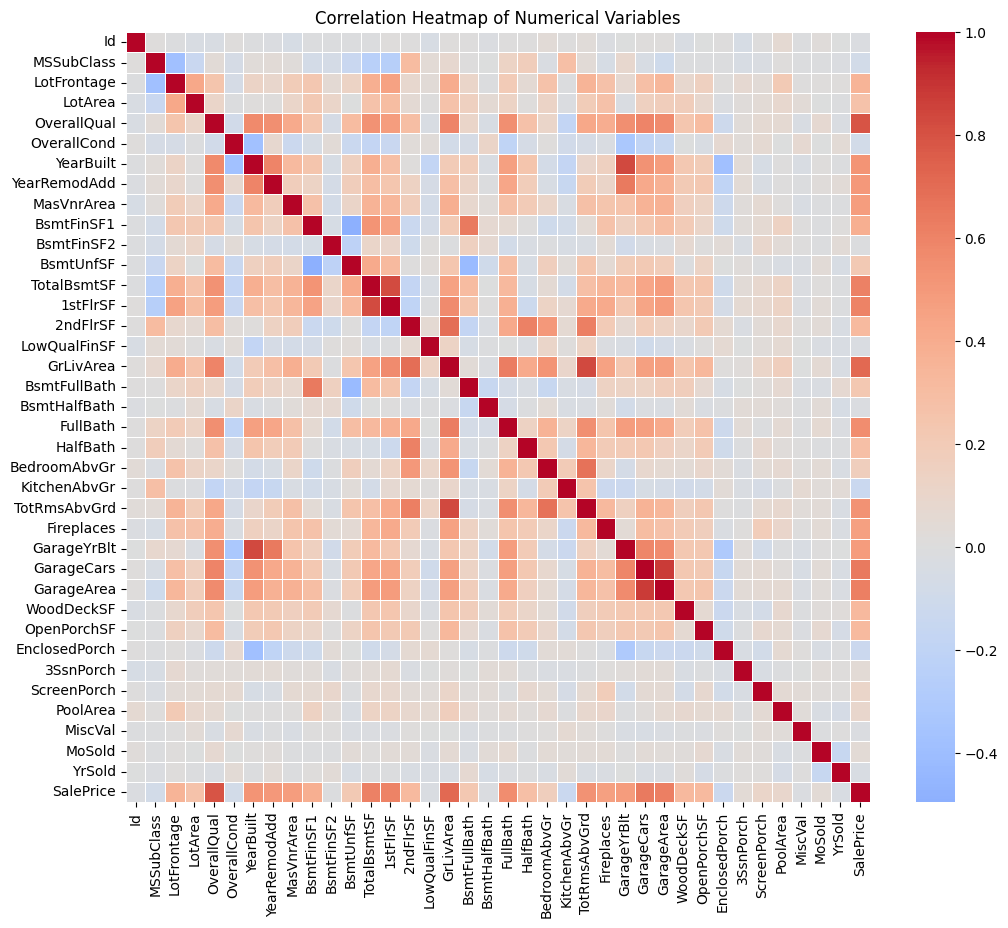

In [25]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Report:

The correlation analysis shows that SalePrice is strongly associated with quality- and size-related features. Several predictor variables also exhibit high intercorrelations, indicating potential multicollinearity that may require feature selection in later modeling stages.

4. Data Quality Report

In [26]:
#Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


The dataset is generally well-structured but contains several data quality challenges, including missing values, potential outliers, categorical imbalance, and multicollinearity among predictors. Addressing these issues through careful preprocessing will be essential to prepare the data for effective model development.

Part 2: Pre-Processing

1. Handle Missing Value

In [29]:
cat_none_cols = [
    'Alley', 'PoolQC', 'Fence', 'MiscFeature',
    'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2'
]

df[cat_none_cols] = df[cat_none_cols].fillna('None')

In [32]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

        df[col].fillna(df[col].median(), inplace=True)

2. Encoding

In [33]:
#Ordinal categorical variables
qual_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0
}

ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond', 'PoolQC'
]

for col in ordinal_cols:
    df[col] = df[col].map(qual_mapping)

In [34]:
nominal_cols = df.select_dtypes(include='object').columns

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [35]:
df.shape

(1460, 230)

In [36]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,False,False,False,False,True,False,False,False,True,False


Ordinal categorical variables were encoded using meaningful numerical mappings, while nominal variables were transformed using one-hot encoding. This ensures all features are in numerical form and suitable for model training.

3. IDness

In [37]:
df.drop(columns=['Id'], inplace=True)

In [38]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

The identifier variable was removed because it does not carry meaningful information for predicting house prices and could negatively impact model performance if retained.

4. Handle Outliers

In [39]:
outlier_cols = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']

In [40]:
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} potential outliers")

SalePrice: 61 potential outliers
GrLivArea: 31 potential outliers
LotArea: 69 potential outliers
TotalBsmtSF: 61 potential outliers


In [41]:
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

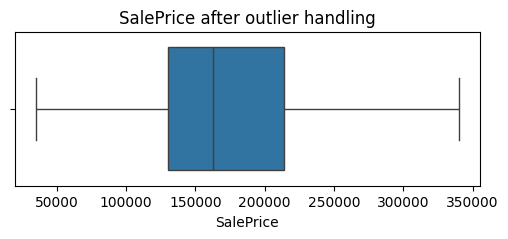

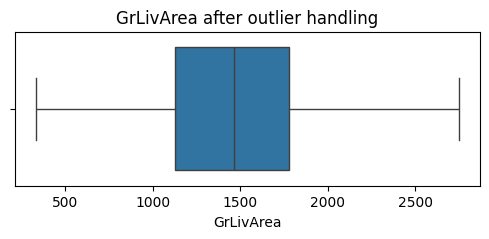

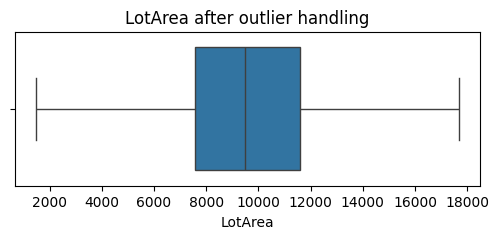

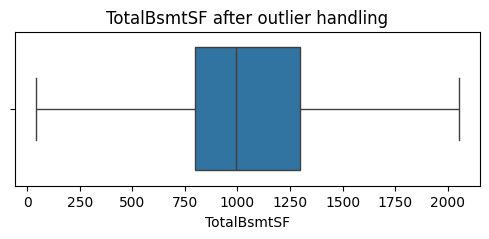

In [42]:
for col in outlier_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'{col} after outlier handling')
    plt.show()

Outliers were identified using the interquartile range (IQR) method for key numerical variables. Extreme values were capped within a reasonable range to reduce their influence while retaining all observations.

5. Normalization & Scaling

In [43]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [44]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [45]:
df[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-8.455945e-17,2.798370e-16,5.535907e-17,1.387018e-16,3.540547e-16,1.046347e-15,4.496860e-15,-3.893385e-17,-3.504046e-16,1.752023e-16,...,5.596741e-17,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,2.433366e-18,-2.676702e-17,7.543433e-17,3.567436e-14
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-2.219047e+00,-2.272642e+00,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-2.431510e+00,-5.937195e+00,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-6.623607e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00
25%,-8.725628e-01,-4.479400e-01,-5.827484e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.707501e-01,-6.896039e-01,-2.381124e-01,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-6.623607e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01
50%,-1.631095e-01,-3.922314e-02,-4.700310e-02,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.707501e-01,-6.896039e-01,-2.381124e-01,...,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-6.623607e-02,-8.768781e-02,-1.191097e-01,1.387775e-01
75%,3.098594e-01,4.149067e-01,5.438474e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.383686e-01,1.052302e+00,-2.381124e-01,...,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-6.623607e-02,-8.768781e-02,6.208910e-01,8.919936e-01
max,3.147673e+00,1.104155e+01,2.233741e+00,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.285201e+00,2.794208e+00,5.460970e+00,...,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,1.853082e+01,3.116527e+01,2.100892e+00,1.645210e+00


Numerical features were standardized using z-score scaling to ensure comparable feature scales. This helps improve model stability and prevents variables with large magnitudes from dominating the learning process.

6. Stability & Health Checks

In [46]:
#Check for Remaining Missing Values
df.isnull().sum().sum()

np.int64(0)

In [47]:
#Verify Data Types
df.dtypes.value_counts()

,count
bool,182
float64,47


In [49]:
#Check for Infinite or Invalid Values
np.isinf(df).sum().sum()

np.int64(0)

In [50]:
#Inspect Feature Scale Consistency
df.describe().T[['mean', 'std', 'min', 'max']].head()

,mean,std,min,max
MSSubClass,-8.455945e-17,1.000343,-0.872563,3.147673
LotFrontage,2.798370e-16,1.000343,-2.219047,11.041546
LotArea,5.535907e-17,1.000343,-2.272642,2.233741
OverallQual,1.387018e-16,1.000343,-3.688413,2.821425
OverallCond,3.540547e-16,1.000343,-4.112970,3.078570


In [51]:
df.shape

(1460, 229)

Part 3: Post Processing

1. Collinearity - Visualization

In [52]:
corr = df.corr()

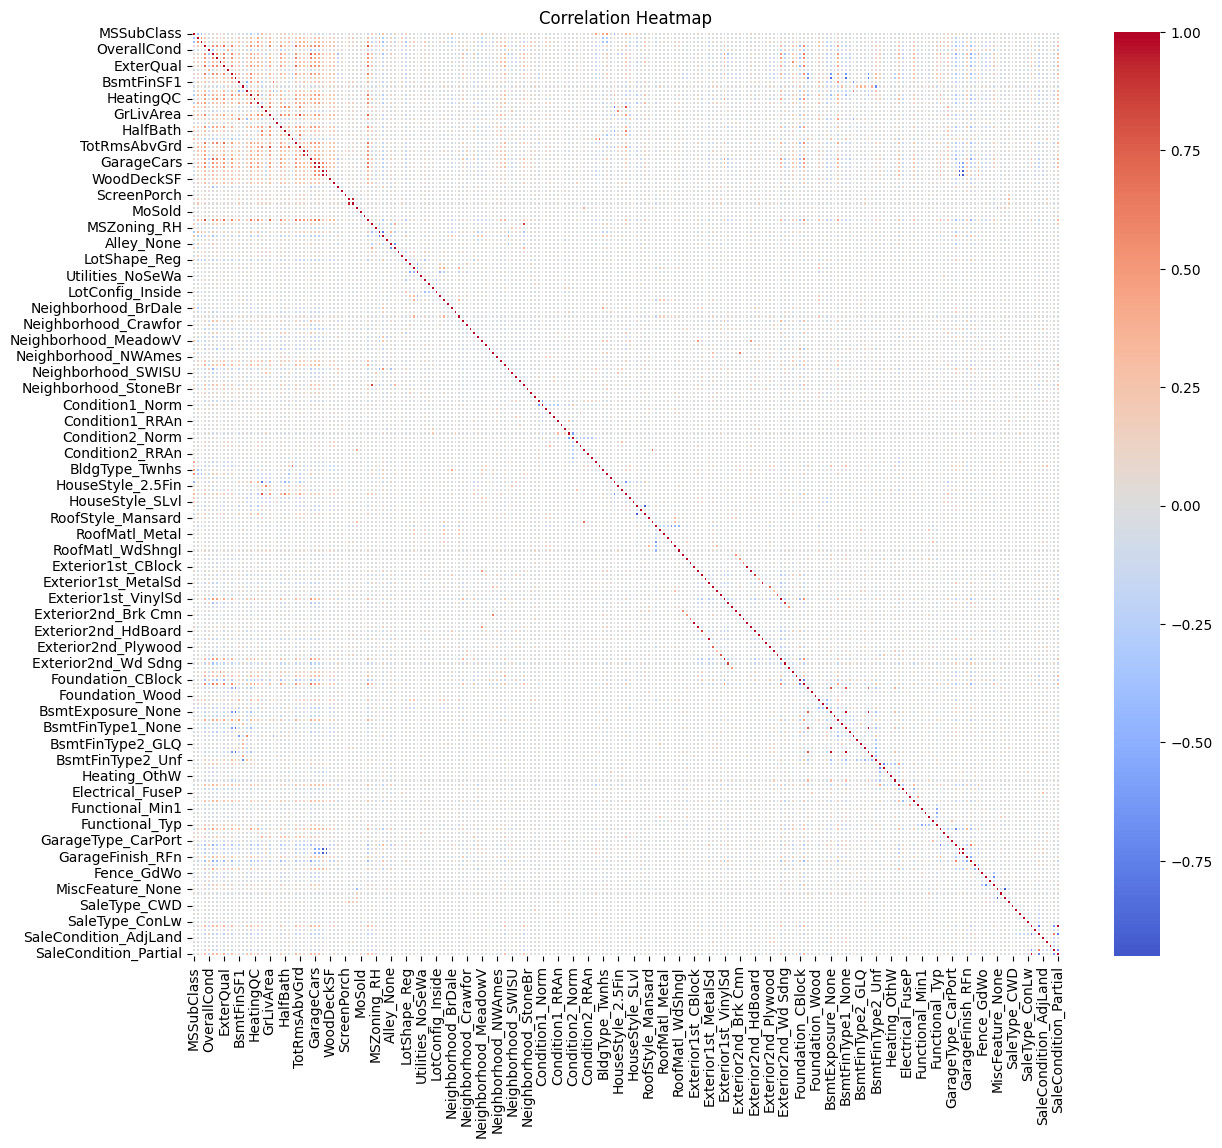

In [53]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.3
)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals strong relationships between several predictors and the target variable, as well as high correlations among certain feature pairs. These patterns indicate potential multicollinearity that should be addressed through feature selection.

2. Collinearity - Identification

In [54]:
threshold = 0.8

In [55]:
corr_matrix = df.corr().abs()

high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_matrix.iloc[i, j]))

high_corr_pairs

[('TotRmsAbvGrd', 'GrLivArea', np.float64(0.8355677605507331)),
 ('FireplaceQu', 'Fireplaces', np.float64(0.863241235888451)),
 ('GarageArea', 'GarageCars', np.float64(0.8824754142814624)),
 ('GarageCond', 'GarageQual', np.float64(0.9591716048953671)),
 ('PoolQC', 'PoolArea', np.float64(0.937056500547721)),
 ('SalePrice', 'OverallQual', np.float64(0.81685599282973)),
 ('MSZoning_RM', 'MSZoning_RL', np.float64(0.8085853546363103)),
 ('Neighborhood_Somerst', 'MSZoning_FV', np.float64(0.8628071099772279)),
 ('HouseStyle_2Story', '2ndFlrSF', np.float64(0.8091497798648843)),
 ('RoofStyle_Hip', 'RoofStyle_Gable', np.float64(0.9334615823692307)),
 ('Exterior2nd_CBlock', 'Exterior1st_CBlock', np.float64(1.0)),
 ('Exterior2nd_CmentBd',
  'Exterior1st_CemntBd',
  np.float64(0.9741710841939724)),
 ('Exterior2nd_HdBoard', 'Exterior1st_HdBoard', np.float64(0.883271397030471)),
 ('Exterior2nd_MetalSd',
  'Exterior1st_MetalSd',
  np.float64(0.9730651937625319)),
 ('Exterior2nd_VinylSd',
  'Exterior1s

Correlation analysis identified multiple highly correlated predictor pairs, indicating the presence of multicollinearity. These findings motivate the need for feature selection to reduce redundancy and improve model stability.